In [ ]:
#基于 TR-train.csv 数据创建线性回归模型，计算其在 TR-test.csv 数据上的 r² 分数，并可视化模型预测结果。
#添加多项式特征（2阶、5阶）并建立回归模型。
#计算测试数据的多项式回归模型的 r² 分数，并确定哪个模型的预测更准确。
#可视化多项式回归模型预测结果，并确定哪个模型预测更准确。

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train = pd.read_csv('T-R-train.csv')
data_test = pd.read_csv('T-R-test.csv')
data_train.head()


,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


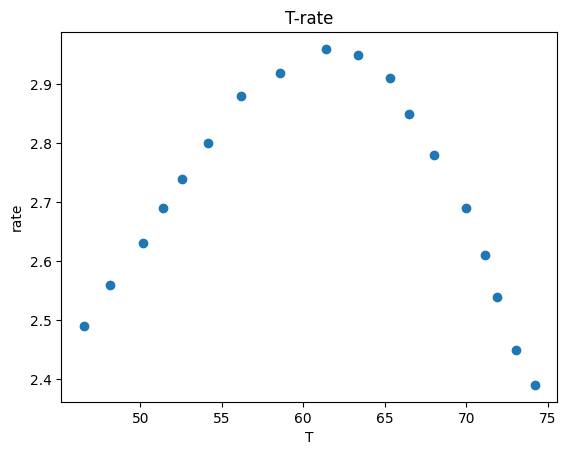

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
x_train = data_train['T']
y_train = data_train['rate']
fig0 = plt.figure()
plt.scatter(x_train, y_train)
label_x = 'T'
label_y = 'rate'
plt.xlabel(label_x)
plt.ylabel(label_y)
plt.title('T-rate')
plt.show()
#print(y)

In [52]:
#trained linear model
import sklearn as sk
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
x_train = np.array(x_train).reshape(-1, 1)
linear_model.fit(x_train, y_train)



LinearRegression()

In [53]:
#make prediction of train and test model
x_test = data_test['T']
y_test = data_test['rate']
x_test = np.array(x_test).reshape(-1, 1)

y_test_predict = linear_model.predict(x_test)
y_train_predict = linear_model.predict(x_train)

import sklearn.metrics as accuray_score
from sklearn.metrics import r2_score
accuray_score_train = r2_score(y_train, y_train_predict)
accuray_score_test = r2_score(y_test, y_test_predict)
print('accuray_score_train:', accuray_score_train)
print('accuray_score_test:', accuray_score_test)

accuray_score_train: 0.016665703886981964
accuray_score_test: -0.758336343735132


In [54]:
#generate new data
x_range = np.linspace(40,90,300).reshape(-1, 1)
y_range_predict = linear_model.predict(x_range)

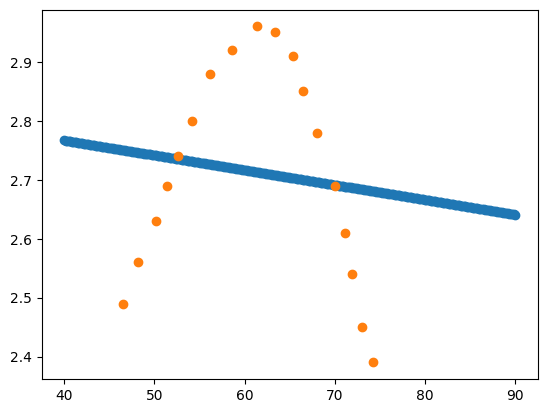

In [36]:
fig1 = plt.figure()
plt.scatter(x_range, y_range_predict)
plt.scatter(x_train, y_train)
plt.show()

In [74]:
#multi（2 and 5）
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_2_train = poly.fit_transform(x_train)
x_2_test = poly.fit_transform(x_test)
#
poly5 = PolynomialFeatures(degree=5)
x_5_train = poly5.fit_transform(x_train)
x_5_test = poly5.fit_transform(x_test)

In [82]:
linear_model_2 = LinearRegression()
linear_model_2.fit(x_2_train, y_train)

linear_model_5 = LinearRegression()
linear_model_5.fit(x_5_train, y_train)

# Use linear_model_2 which is trained on polynomial features for prediction
y_2_test_predict = linear_model_2.predict(x_2_test)
y_2_train_predict = linear_model_2.predict(x_2_train)

y_5_test_predict = linear_model_5.predict(x_5_test)
y_5_train_predict = linear_model_5.predict(x_5_train)

#find r2 score
import sklearn.metrics as accuray_score
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_2_train_predict)
r2_score_test = r2_score(y_test, y_2_test_predict)
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)

r2_score_train_5 = r2_score(y_train, y_5_train_predict)
r2_score_test_5 = r2_score(y_test, y_5_test_predict)
print('r2_score_train_5:', r2_score_train_5)
print('r2_score_test_5:', r2_score_test_5)

r2_score_train: 0.970051540068942
r2_score_test: 0.9963954556468684
r2_score_train_5: 0.9978527267187658
r2_score_test_5: 0.5437837627379174


In [76]:
x_2_range = np.linspace(40,90,300).reshape(-1, 1)
x_2_range_transformed = poly.fit_transform(x_2_range)
y_2_range_predict = linear_model_2.predict(x_2_range_transformed)

x_5_range = np.linspace(40,90,300).reshape(-1, 1)
x_5_range_transformed = poly5.fit_transform(x_5_range)
y_5_range_predict = linear_model_5.predict(x_5_range_transformed)


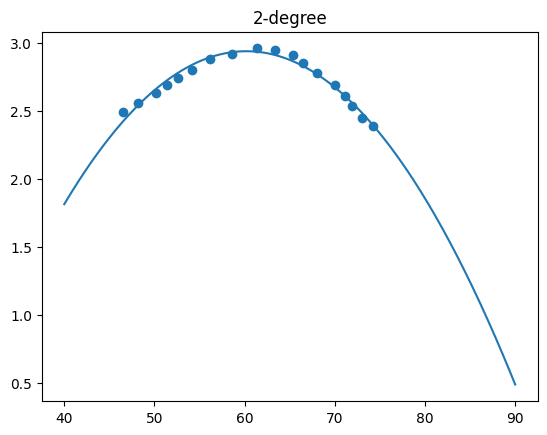

In [80]:

fig3 = plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_2_range, y_2_range_predict)
plt.title('2-degree')
plt.show()
#print(y)


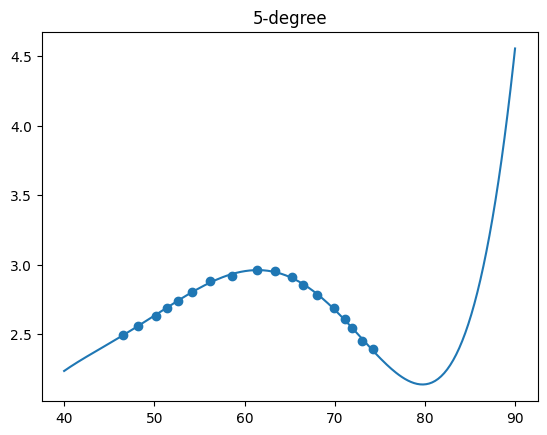

In [81]:

fig4 = plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_5_range, y_5_range_predict)
plt.title('5-degree')
plt.show()
#print(y)